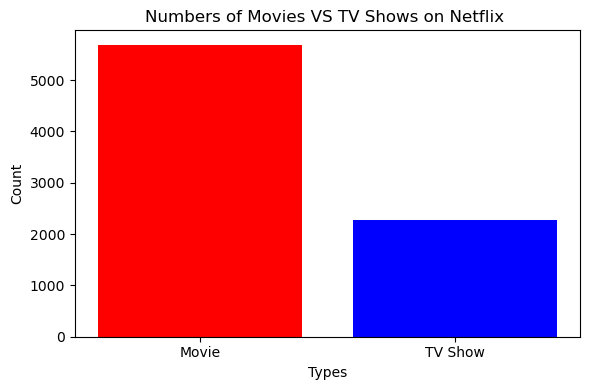

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('netflix_titles.csv')

df = df.dropna(subset=['type','release_year','rating','country','duration'])
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index,type_counts.values,color=['red','blue'])
plt.title('Numbers of Movies VS TV Shows on Netflix ')
plt.xlabel('Types')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show()

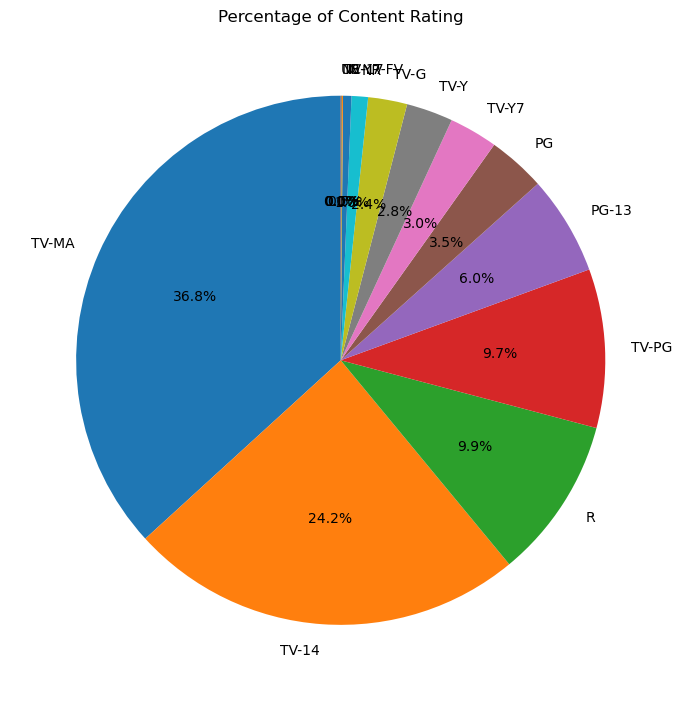

In [9]:
rating_count = df['rating'].value_counts()
plt.figure(figsize=(7,10))
plt.pie(rating_count,labels=rating_count.index,autopct = '%1.1f%%',startangle=90)
plt.title('Percentage of Content Rating')
plt.tight_layout()
plt.savefig('content_Ratings_pie.png')
plt.show()

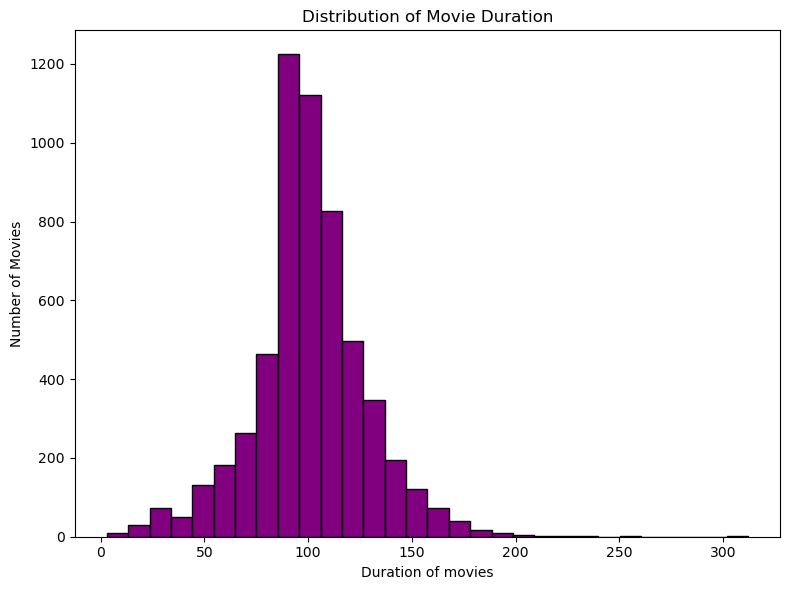

In [10]:
movie_df = df[df['type']=='Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration of movies')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram_view.png')
plt.show()

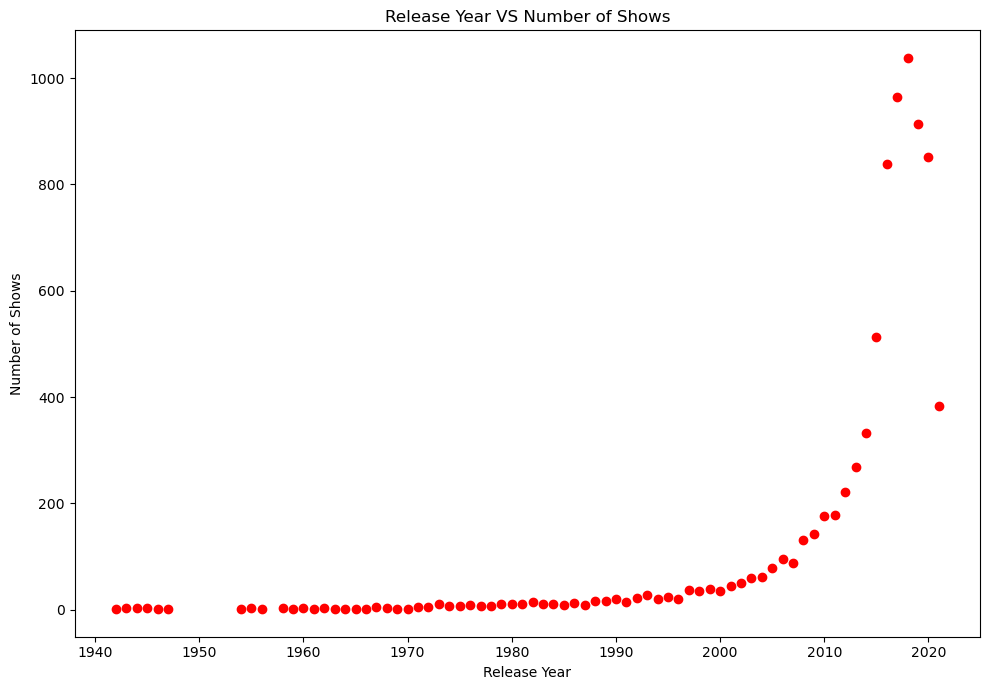

In [14]:
release_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,7))
plt.scatter(release_counts.index,release_counts.values,color='red')
plt.title('Release Year VS Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_show.png')
plt.show()

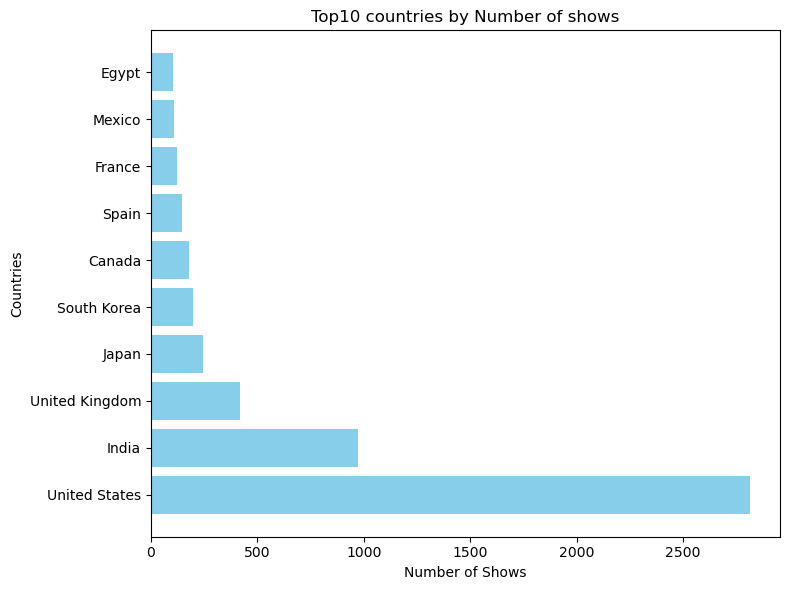

In [13]:
country_count = df['country'].value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(country_count.index,country_count.values,color ='skyblue')
plt.title('Top10 countries by Number of shows')
plt.xlabel('Number of Shows')
plt.ylabel('Countries')
plt.tight_layout()
plt.savefig('top_10_countries.png')
plt.show()

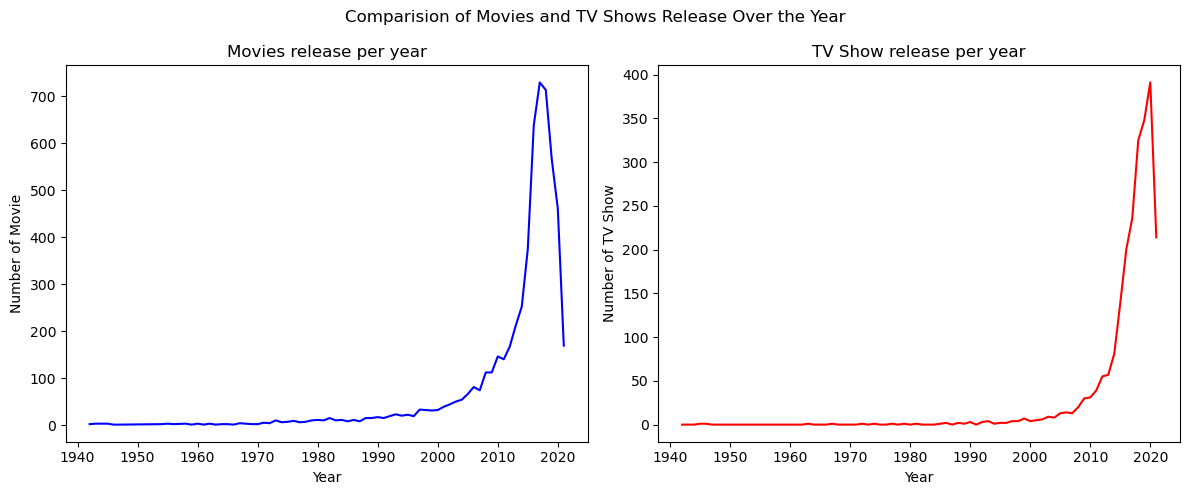

In [19]:
content_by_year = df.groupby(['release_year','type']).size().unstack().fillna(0)
fig,ax = plt.subplots(1,2,figsize=(12,5))

#For the 1st subplot movie

ax[0].plot(content_by_year.index,content_by_year['Movie'],color='blue')
ax[0].set_title('Movies release per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movie')

#For the 2nd subplot TV Shows

ax[1].plot(content_by_year.index,content_by_year['TV Show'],color='red')
ax[1].set_title('TV Show release per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Show')

plt.suptitle('Comparision of Movies and TV Shows Release Over the Year')
plt.tight_layout()
plt.savefig('comparison_movies_and_tvshows.png')
plt.show()